In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Allow Multiple Output per Cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'

In [3]:
ten_year_yields = pd.read_csv('/Users/diamondcorp/Downloads/USD10Y.csv', index_col=0)
two_year_yields = pd.read_csv('/Users/diamondcorp/Downloads/USD02Y.csv',index_col=0)

In [4]:
for col in two_year_yields.columns:
    two_year_yields[col] = two_year_yields[col].replace({'%':''}, regex=True)
for col in ten_year_yields.columns:
    ten_year_yields[col] = ten_year_yields[col].replace({'%':''}, regex=True)


In [5]:
two_year_yields = two_year_yields.astype(float)
#two_year_yields
ten_year_yields = ten_year_yields.astype(float)
ten_year_yields

,Open,High,Low,Close
Date,,,,
03/07/2024,4.096,4.130,4.056,4.087
03/06/2024,4.157,4.174,4.083,4.101
03/05/2024,4.219,4.226,4.115,4.155
03/04/2024,4.198,4.238,4.189,4.216
03/01/2024,4.259,4.301,4.178,4.185
...,...,...,...,...
03/13/2023,3.705,3.750,3.433,3.577
03/10/2023,3.911,3.911,3.682,3.705
03/09/2023,3.992,4.018,3.898,3.911


<Axes: xlabel='Date'>

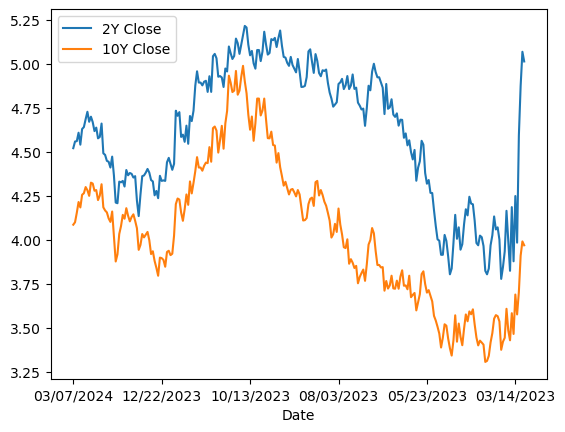

In [6]:
df = pd.DataFrame()
df['2Y Close'] = two_year_yields['Close']
df['10Y Close'] = ten_year_yields['Close']
df.plot()

In [7]:
df

,2Y Close,10Y Close
Date,,
03/07/2024,4.522,4.087
03/06/2024,4.560,4.101
03/05/2024,4.562,4.155
03/04/2024,4.610,4.216
03/01/2024,4.542,4.185
...,...,...
03/13/2023,3.985,3.577
03/10/2023,4.595,3.705
03/09/2023,4.876,3.911


In [8]:
def abline(ax, b, m,*args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim, *args, **kwargs)
    

In [9]:
df

,2Y Close,10Y Close
Date,,
03/07/2024,4.522,4.087
03/06/2024,4.560,4.101
03/05/2024,4.562,4.155
03/04/2024,4.610,4.216
03/01/2024,4.542,4.185
...,...,...
03/13/2023,3.985,3.577
03/10/2023,4.595,3.705
03/09/2023,4.876,3.911


In [10]:
X = df[['2Y Close']]
Y = df['10Y Close']
import statsmodels.api as sm

res = sm.OLS(Y,X).fit()
print(res.summary())
res.params

                                 OLS Regression Results                                
Dep. Variable:              10Y Close   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          7.853e+04
Date:                Sun, 22 Sep 2024   Prob (F-statistic):                   1.72e-319
Time:                        08:07:24   Log-Likelihood:                          11.776
No. Observations:                 256   AIC:                                     -21.55
Df Residuals:                     255   BIC:                                     -18.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

2Y Close    0.876984
dtype: float64

/var/folders/fg/lyxtjzk51db3g5rg5jncdg3w0000gn/T/ipykernel_64934/1221672374.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, 0,res.params[0],'r--' , linewidth = 3)


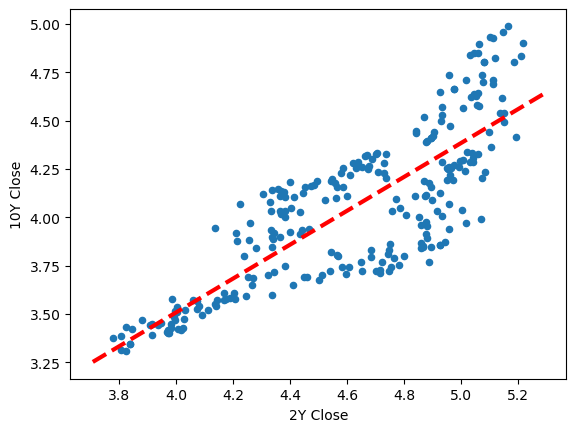

In [11]:
ax = df.plot.scatter('2Y Close','10Y Close')
abline(ax, 0,res.params[0],'r--' , linewidth = 3)


In [12]:
#pip install scikit-learn

In [13]:
#USing SkLearn
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,Y)

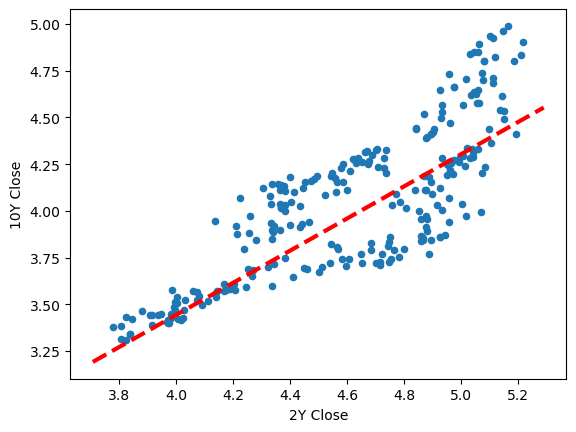

In [14]:
ax = df.plot.scatter('2Y Close','10Y Close')
abline(ax, 0, model.coef_, 'r--' , linewidth = 3)

In [15]:
type(df['2Y Close'])

pandas.core.series.Series

In [16]:
type(df[['2Y Close']])

pandas.core.frame.DataFrame

In [17]:
treasurycurve_2023 = pd.read_csv('/Users/diamondcorp/Downloads/daily-treasury-rates-2023.csv', index_col=0)

In [18]:
treasurycurve_2023

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
12/29/2023,5.60,5.59,5.40,5.41,5.26,4.79,4.23,4.01,3.84,3.88,3.88,4.20,4.03
12/28/2023,5.57,5.55,5.45,5.42,5.28,4.82,4.26,4.02,3.83,3.84,3.84,4.14,3.98
12/27/2023,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95
12/26/2023,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04
12/22/2023,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/09/2023,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66
01/06/2023,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
01/05/2023,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78


<Axes: xlabel='Date'>

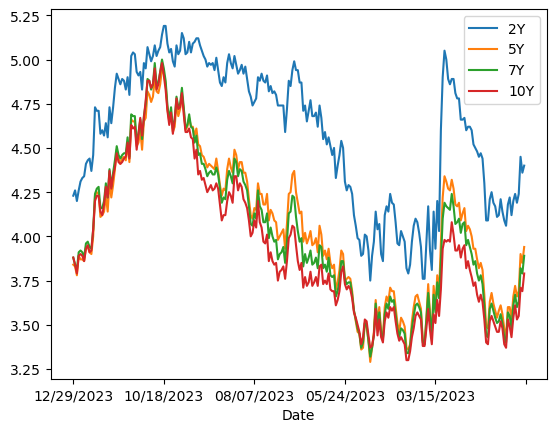

In [19]:
treasurydata = pd.DataFrame()
treasurydata['2Y'] = treasurycurve_2023['2 Yr']
treasurydata['5Y'] = treasurycurve_2023['5 Yr']
treasurydata['7Y'] = treasurycurve_2023['7 Yr']
treasurydata['10Y'] = treasurycurve_2023['10 Yr']
treasurydata.plot()

In [20]:
treasurydata

,2Y,5Y,7Y,10Y
Date,,,,
12/29/2023,4.23,3.84,3.88,3.88
12/28/2023,4.26,3.83,3.84,3.84
12/27/2023,4.20,3.78,3.81,3.79
12/26/2023,4.26,3.89,3.91,3.89
12/22/2023,4.31,3.87,3.92,3.90
...,...,...,...,...
01/09/2023,4.19,3.66,3.60,3.53
01/06/2023,4.24,3.69,3.63,3.55
01/05/2023,4.45,3.90,3.82,3.71


In [21]:
cov_mat = pd.DataFrame.cov(treasurydata)
cov_mat

,2Y,5Y,7Y,10Y
2Y,0.155307,0.154047,0.153571,0.146705
5Y,0.154047,0.168253,0.173620,0.170903
7Y,0.153571,0.173620,0.182075,0.181731
10Y,0.146705,0.170903,0.181731,0.183887


In [22]:
cor_mat = pd.DataFrame.corr(treasurydata)
cor_mat

,2Y,5Y,7Y,10Y
2Y,1.000000,0.952961,0.913250,0.868111
5Y,0.952961,1.000000,0.991956,0.971609
7Y,0.913250,0.991956,1.000000,0.993181
10Y,0.868111,0.971609,0.993181,1.000000


In [23]:
X = treasurydata.drop(columns=['7Y','5Y'])
X
Y = treasurydata['5Y']
newmodel = LinearRegression().fit(X,Y)
newmodel.coef_

array([0.46256783, 0.56035157])

In [24]:
treasurydata['2s5s10s']= treasurydata['5Y'] - newmodel.coef_[0]*treasurydata['2Y'] - newmodel.coef_[1]*treasurydata['10Y']

<Axes: xlabel='Date'>

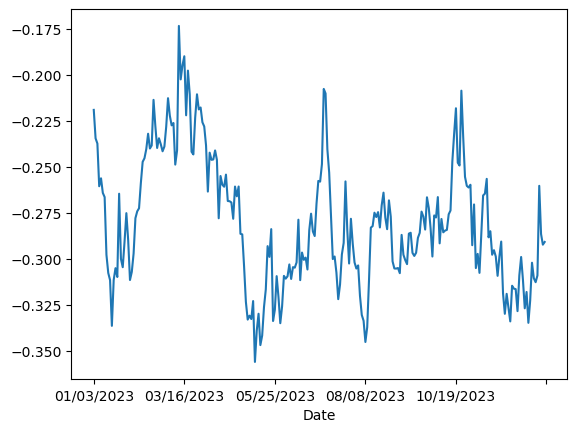

In [25]:
treasurydata = treasurydata[::-1]
treasurydata
treasurydata['2s5s10s'].plot()

In [26]:
import numpy as np
ravg = np.convolve(treasurydata['2s5s10s'], np.ones(10)/10, mode='valid')


In [27]:
len(ravg)
treasurydata['2s5s10s'][0]

/var/folders/fg/lyxtjzk51db3g5rg5jncdg3w0000gn/T/ipykernel_64934/4138077311.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  treasurydata['2s5s10s'][0]


-0.21903090796880953

In [28]:
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][8])
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][7])
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][6])
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][5])
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][4])
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][3])
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][2])
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][1])
ravg = np.insert(ravg,0,treasurydata['2s5s10s'][0])
len(ravg)

/var/folders/fg/lyxtjzk51db3g5rg5jncdg3w0000gn/T/ipykernel_64934/3224569060.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ravg = np.insert(ravg,0,treasurydata['2s5s10s'][8])
/var/folders/fg/lyxtjzk51db3g5rg5jncdg3w0000gn/T/ipykernel_64934/3224569060.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ravg = np.insert(ravg,0,treasurydata['2s5s10s'][7])
/var/folders/fg/lyxtjzk51db3g5rg5jncdg3w0000gn/T/ipykernel_64934/3224569060.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

250

In [29]:
treasurydata['ravg'] = ravg.tolist()

/var/folders/fg/lyxtjzk51db3g5rg5jncdg3w0000gn/T/ipykernel_64934/2623382818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treasurydata['ravg'] = ravg.tolist()


<Axes: xlabel='Date'>

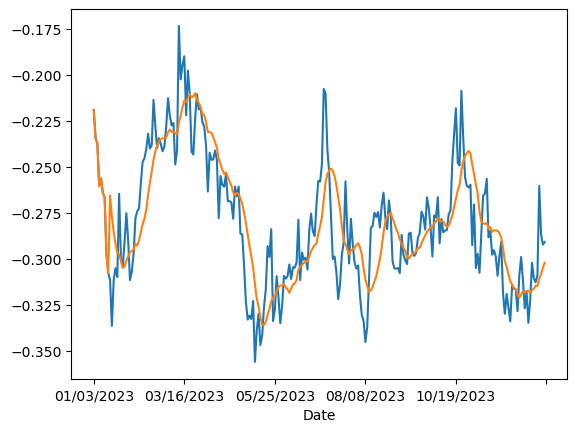

In [30]:
treasurydata['2s5s10s'].plot()
treasurydata['ravg'].plot()

In [31]:
ravg

array([-0.21903091, -0.23449304, -0.23733117, -0.26053568, -0.25620026,
       -0.26415677, -0.26642945, -0.29778535, -0.30766323, -0.26552004,
       -0.27725797, -0.28495809, -0.2917304 , -0.29666164, -0.29750121,
       -0.30108255, -0.30489309, -0.30417423, -0.30092404, -0.2987514 ,
       -0.2962598 , -0.29582015, -0.295023  , -0.29182592, -0.29278318,
       -0.29003646, -0.2854624 , -0.28112973, -0.27814504, -0.27319398,
       -0.26524484, -0.2585371 , -0.25266433, -0.24623465, -0.24159257,
       -0.23831529, -0.23588217, -0.23492039, -0.23454189, -0.2344048 ,
       -0.23402362, -0.23128912, -0.22966921, -0.23105465, -0.23089655,
       -0.23179994, -0.23246493, -0.22603933, -0.22213285, -0.21770876,
       -0.21387789, -0.21480788, -0.21236087, -0.21067438, -0.21223691,
       -0.21168484, -0.20989789, -0.21361408, -0.21524469, -0.21754532,
       -0.2211347 , -0.22174206, -0.22581349, -0.23110031, -0.23115033,
       -0.23144293, -0.2337172 , -0.23676839, -0.23950674, -0.24

In [32]:
# PCA Implementation
#----------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
sc = StandardScaler()

pca = PCA(n_components=3)


In [33]:
pca_data = treasurydata.drop(columns=['2s5s10s','ravg'])
pca_data
pca_data_scaled = sc.fit_transform(pca_data)

In [34]:
scores = pca.fit_transform(pca_data_scaled)
eigenvectors = pca.components_
eigenvectors
#pca.mean_

array([[ 0.48506011,  0.5091384 ,  0.50692211,  0.49852256],
       [ 0.79860278,  0.03548628, -0.27393557, -0.53472762],
       [-0.35303469,  0.71458847,  0.18535414, -0.5747814 ]])

In [35]:
eigenvalues = pca.explained_variance_ratio_
eigenvalues

array([0.96172045, 0.03695364, 0.00124566])

Text(0.5, 1.0, 'Scaled Eigenvalues of a PCA on the US yield curve')

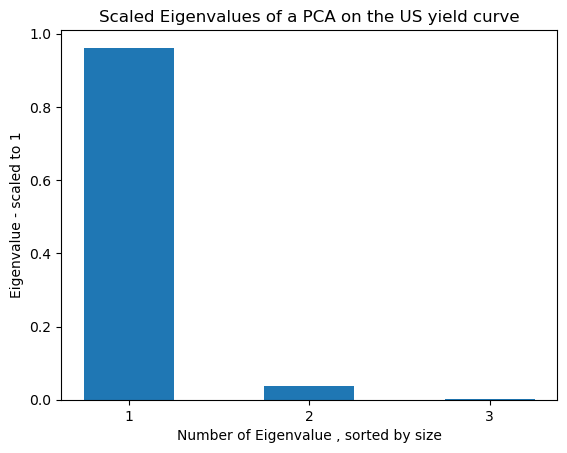

In [36]:
axis = [1,2,3]
axis
plt.bar(np.arange(3), eigenvalues, 0.5, label = "scaled eigenvalues")
plt.xticks(np.arange(3),['1','2','3']) 
plt.xlabel("Number of Eigenvalue , sorted by size") 
plt.ylabel("Eigenvalue - scaled to 1") 
plt.title("Scaled Eigenvalues of a PCA on the US yield curve") 

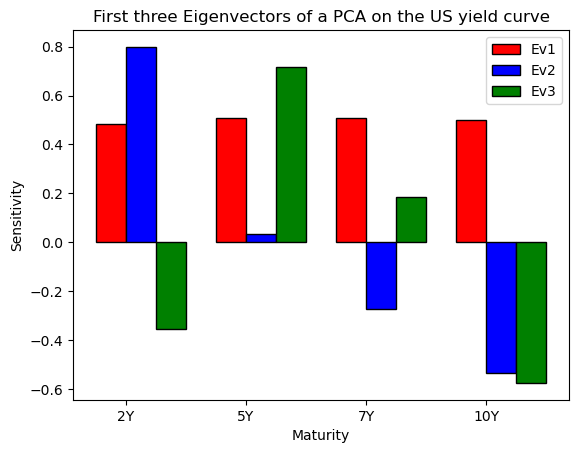

In [37]:
n=4
r = np.arange(n) 
width = 0.25
#ev_axis = [2,5,7,10]
plt.bar(r, eigenvectors[0],color = 'r', 
        width = width, edgecolor = 'black', 
        label='Ev1')
plt.bar(r + width, eigenvectors[1] ,color = 'b', 
        width = width, edgecolor = 'black', 
        label='Ev2')
plt.bar(r + 2*width, eigenvectors[2] ,color = 'g', 
        width = width, edgecolor = 'black', 
        label='Ev3')
plt.xlabel("Maturity") 
plt.ylabel("Sensitivity") 
plt.title("First three Eigenvectors of a PCA on the US yield curve") 
plt.xticks(r + width/2,['2Y','5Y','7Y','10Y']) 
plt.legend() 
  
plt.show() 

In [38]:
pca_data

,2Y,5Y,7Y,10Y
Date,,,,
01/03/2023,4.40,3.94,3.89,3.79
01/04/2023,4.36,3.85,3.79,3.69
01/05/2023,4.45,3.90,3.82,3.71
01/06/2023,4.24,3.69,3.63,3.55
01/09/2023,4.19,3.66,3.60,3.53
...,...,...,...,...
12/22/2023,4.31,3.87,3.92,3.90
12/26/2023,4.26,3.89,3.91,3.89
12/27/2023,4.20,3.78,3.81,3.79


In [39]:
scores_df = pd.DataFrame(scores,index= treasurydata.index)
scores_df.columns = ['Factor1','Factor2','Factor3']

<Axes: xlabel='Date'>

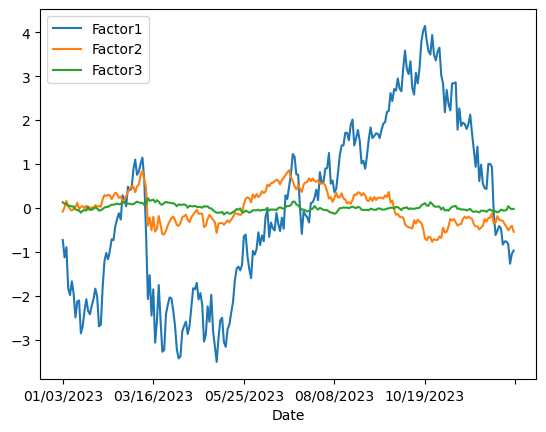

In [40]:
scores_df.plot()

In [41]:
pca_data_scaled_df = pd.DataFrame(pca_data_scaled, index=treasurydata.index, columns=pca_data.columns)
pca_data_scaled_df

,2Y,5Y,7Y,10Y
Date,,,,
01/03/2023,-0.465191,-0.288544,-0.318142,-0.394895
01/04/2023,-0.566894,-0.508397,-0.552967,-0.628561
01/05/2023,-0.338062,-0.386256,-0.482520,-0.581827
01/06/2023,-0.872004,-0.899245,-0.928689,-0.955693
01/09/2023,-0.999133,-0.972530,-0.999136,-1.002426
...,...,...,...,...
12/22/2023,-0.694023,-0.459540,-0.247694,-0.137863
12/26/2023,-0.821152,-0.410684,-0.271177,-0.161229
12/27/2023,-0.973707,-0.679393,-0.506002,-0.394895


In [42]:
scores_df = scores_df.join(pca_data_scaled_df)

In [43]:
scores_df

,Factor1,Factor2,Factor3,2Y,5Y,7Y,10Y
Date,,,,,,,
01/03/2023,-0.730692,-0.083430,0.126048,-0.465191,-0.288544,-0.318142,-0.394895
01/04/2023,-1.127485,0.016822,0.095629,-0.566894,-0.508397,-0.552967,-0.628561
01/05/2023,-0.895292,0.159615,0.088320,-0.338062,-0.386256,-0.482520,-0.581827
01/06/2023,-1.828022,0.037140,0.042435,-0.872004,-0.899245,-0.928689,-0.955693
01/09/2023,-1.986008,-0.022698,0.048752,-0.999133,-0.972530,-0.999136,-1.002426
...,...,...,...,...,...,...,...
12/22/2023,-0.764902,-0.428985,-0.050038,-0.694023,-0.459540,-0.247694,-0.137863
12/26/2023,-0.825245,-0.509850,0.038833,-0.821152,-0.410684,-0.271177,-0.161229
12/27/2023,-1.271579,-0.451941,-0.008545,-0.973707,-0.679393,-0.506002,-0.394895


In [44]:
# check formula for residuals  ??
scores_df["residual2y"] = scores_df["2Y"] - scores_df["Factor1"]*eigenvectors[0,0] - scores_df["Factor2"]*eigenvectors[1,0]
scores_df["residual5y"] = scores_df["5Y"] - scores_df["Factor1"]*eigenvectors[0,1] - scores_df["Factor2"]*eigenvectors[1,1]
scores_df["residual7y"] = scores_df["7Y"] - scores_df["Factor1"]*eigenvectors[0,2] - scores_df["Factor2"]*eigenvectors[1,2]
scores_df["residual10y"] = scores_df["10Y"] - scores_df["Factor1"]*eigenvectors[0,3] - scores_df["Factor2"]*eigenvectors[1,3]

In [45]:
scores_df

,Factor1,Factor2,Factor3,2Y,5Y,7Y,10Y,residual2y,residual5y,residual7y,residual10y
Date,,,,,,,,,,,
01/03/2023,-0.730692,-0.083430,0.126048,-0.465191,-0.288544,-0.318142,-0.394895,-0.044134,0.086440,0.029407,-0.075241
01/04/2023,-1.127485,0.016822,0.095629,-0.566894,-0.508397,-0.552967,-0.628561,-0.033430,0.065052,0.023188,-0.057489
01/05/2023,-0.895292,0.159615,0.088320,-0.338062,-0.386256,-0.482520,-0.581827,-0.031260,0.063907,0.015048,-0.050154
01/06/2023,-1.828022,0.037140,0.042435,-0.872004,-0.899245,-0.928689,-0.955693,-0.014964,0.030153,0.008150,-0.024522
01/09/2023,-1.986008,-0.022698,0.048752,-0.999133,-0.972530,-0.999136,-1.002426,-0.017673,0.039429,0.001397,-0.024493
...,...,...,...,...,...,...,...,...,...,...,...
12/22/2023,-0.764902,-0.428985,-0.050038,-0.694023,-0.459540,-0.247694,-0.137863,0.019589,-0.054876,0.022537,0.014068
12/26/2023,-0.825245,-0.509850,0.038833,-0.821152,-0.410684,-0.271177,-0.161229,-0.013692,0.027572,0.007493,-0.022456
12/27/2023,-1.271579,-0.451941,-0.008545,-0.973707,-0.679393,-0.506002,-0.394895,0.004007,-0.015945,0.014787,-0.002649


In [46]:
scores_df.loc["01/03/2023","residual2y":].values

array([-0.0441337 ,  0.08643965,  0.02940734, -0.07524128])

Text(0.5, 1.0, 'Two factor residuals as of 01/03/2023')

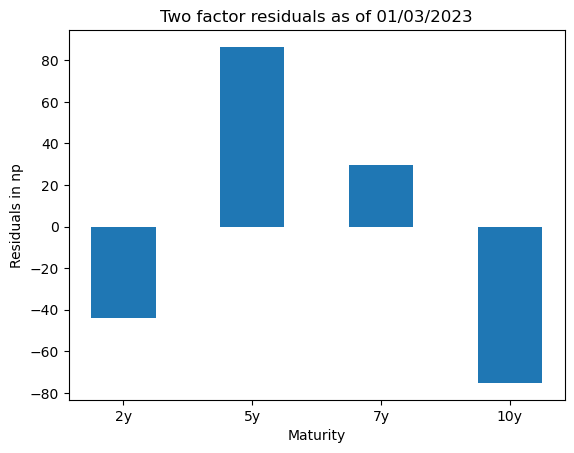

In [47]:
axis = list(treasurydata.columns)
axis
plt.bar(np.arange(4), scores_df.loc["01/03/2023","residual2y":].values*1000, 0.5)
plt.xticks(np.arange(4),['2y','5y','7y','10y']) 
plt.xlabel("Maturity") 
plt.ylabel("Residuals in np") 
plt.title("Two factor residuals as of 01/03/2023") 

In [48]:
pca_data_scaled_df

,2Y,5Y,7Y,10Y
Date,,,,
01/03/2023,-0.465191,-0.288544,-0.318142,-0.394895
01/04/2023,-0.566894,-0.508397,-0.552967,-0.628561
01/05/2023,-0.338062,-0.386256,-0.482520,-0.581827
01/06/2023,-0.872004,-0.899245,-0.928689,-0.955693
01/09/2023,-0.999133,-0.972530,-0.999136,-1.002426
...,...,...,...,...
12/22/2023,-0.694023,-0.459540,-0.247694,-0.137863
12/26/2023,-0.821152,-0.410684,-0.271177,-0.161229
12/27/2023,-0.973707,-0.679393,-0.506002,-0.394895


In [49]:
treasurydata["2Y"].mean()

4.58296

In [50]:
(4.40 - treasurydata["2Y"].mean())/treasurydata["2Y"].std()

-0.464259526146381

In [51]:
x = [11,22,33,44,55]
x[-3:]

[33, 44, 55]

In [52]:
x.index(33)

2

In [53]:
a = [y for y in x if y > 33]

In [54]:
a

[44, 55]

In [55]:
x[1:]

[22, 33, 44, 55]

In [56]:
x.pop()

55

In [57]:
j = pd.DataFrame(np.array([[1,0.513,0.346],[0,0.487,0.329],[0,0,0.325]]))

In [58]:
j.columns = ["1y","2y","3y"]
j.index= ["0y1y","1y1y","2y1y"]
j

,1y,2y,3y
0y1y,1.0,0.513,0.346
1y1y,0.0,0.487,0.329
2y1y,0.0,0.000,0.325


In [59]:
j.values
j.columns[0]

'1y'

In [60]:
Sa = pd.Series([-820,-1100,4000])
Sa.values
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)

In [61]:
Sb = pd.DataFrame(np.matmul(j.values, Sa.values).astype(int), index= j.index , columns=[j.columns[0]])
type(Sb)

pandas.core.frame.DataFrame

In [62]:
Sb

,1y
0y1y,0
1y1y,780
2y1y,1300
